In [13]:
#Jamming Signal Detection and Classification 
#This module covers only classification of obtained signals

In [14]:
# Step 1: Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report



In [15]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.config.experimental.set_visible_devices(tf.config.list_physical_devices('GPU'), 'GPU')

Num GPUs Available:  2


In [16]:
# Step 2: Load the Dataset


In [17]:
# Load each signal type

normal_signals = np.loadtxt('/kaggle/input/input-set/normal_channel.txt')
periodic_signals = np.loadtxt('/kaggle/input/input-set/pereodic_jammer.txt')
constant_signals = np.loadtxt('/kaggle/input/input-set/constant_jammer.txt')


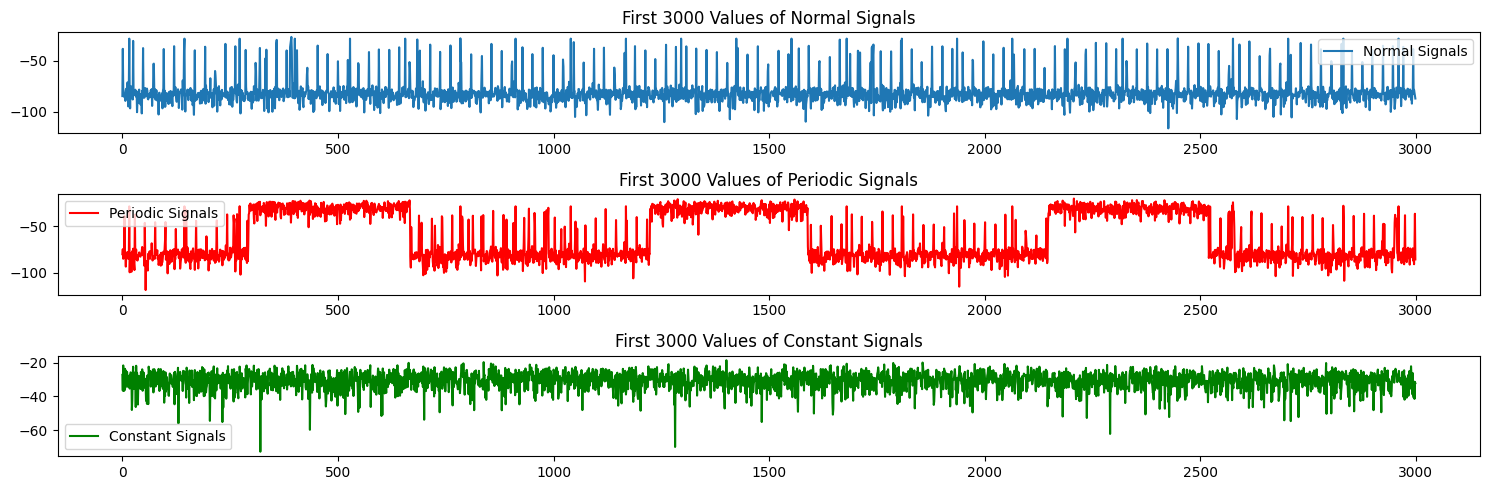

In [18]:
# Visualization of first 3000 values from each signal type
plt.figure(figsize=(15,5))
plt.subplot(3,1,1)
plt.plot(normal_signals[:3000], label='Normal Signals')
plt.title('First 3000 Values of Normal Signals')
plt.legend()

plt.subplot(3,1,2)
plt.plot(periodic_signals[:3000], label='Periodic Signals', color='red')
plt.title('First 3000 Values of Periodic Signals')
plt.legend()

plt.subplot(3,1,3)
plt.plot(constant_signals[:3000], label='Constant Signals', color='green')
plt.title('First 3000 Values of Constant Signals')
plt.legend()

plt.tight_layout()
plt.show()


In [19]:
# Reshape signals (4100 signals, 100 values each)
normal_signals = normal_signals.reshape(4100, 100)
periodic_signals = periodic_signals.reshape(4100, 100)
constant_signals = constant_signals.reshape(4100, 100)


In [20]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normal_signals_scaled = scaler.fit_transform(normal_signals)
periodic_signals_scaled = scaler.transform(periodic_signals)
constant_signals_scaled = scaler.transform(constant_signals)


In [21]:
# Prepare labels
normal_labels = np.zeros(4100)
periodic_labels = np.ones(4100)
constant_labels = np.full(4100, 2)


In [22]:
# Combine data and labels
X = np.vstack((normal_signals_scaled, periodic_signals_scaled, constant_signals_scaled))
y = np.concatenate((normal_labels, periodic_labels, constant_labels))


In [23]:
# Split the data without shuffling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Create and train the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(128,), max_iter=100, random_state=42)
mlp.fit(X_train, y_train)


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(128,), max_iter=100, random_state=42)

In [25]:
# Evaluate the model
train_accuracy = mlp.score(X_train, y_train)
test_accuracy = mlp.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


Training Accuracy: 90.16%
Test Accuracy: 78.13%


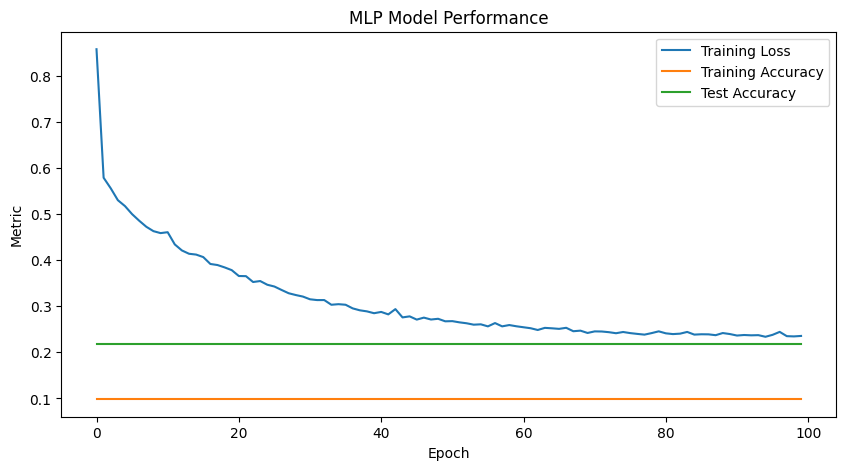

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(mlp.n_iter_), mlp.loss_curve_, label='Training Loss')
plt.plot(np.arange(mlp.n_iter_), [1 - train_accuracy] * mlp.n_iter_, label='Training Accuracy')
plt.plot(np.arange(mlp.n_iter_), [1 - test_accuracy] * mlp.n_iter_, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('MLP Model Performance')
plt.legend()
plt.show()

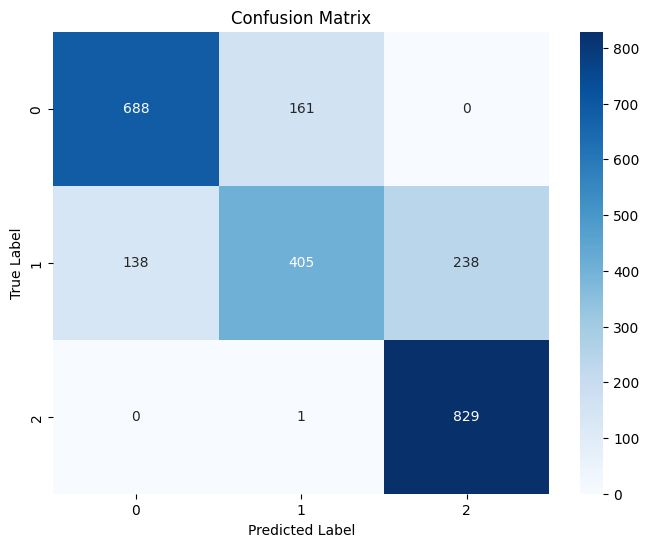

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82       849
         1.0       0.71      0.52      0.60       781
         2.0       0.78      1.00      0.87       830

    accuracy                           0.78      2460
   macro avg       0.77      0.78      0.77      2460
weighted avg       0.78      0.78      0.77      2460



In [26]:
# Confusion matrix
y_pred = mlp.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

In [28]:
#Time to test on a signal generated by us on GNU_Radio

test_signal = np.loadtxt('/kaggle/input/tsiignal/1_Test_Signal.txt')

# Reshape the test signal
test_signal_reshaped = test_signal.reshape(1, 100) #incase the rss values exceed the length of what we consider as 1 signal 

# Standardize the test signal
test_signal_scaled = scaler.transform(test_signal_reshaped)

# Predict the signal type
signal_type = mlp.predict(test_signal_scaled)[0]

# Map the predicted signal type to a label
signal_labels = ['Normal', 'Periodically Jammed', 'Constantly Jammed']
signal_label = signal_labels[int(signal_type)]

print(f"The signal type is: {signal_label}")

The signal type is: Constantly Jammed
